#Maldicion de la dimensionalidad - Norman Vicente

In [10]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

In [4]:
data = np.load('proyecto_training_data.npy')

In [8]:
df = pd.DataFrame(data, columns = ['SalePrice','OverallQual','1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])

In [9]:
df

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


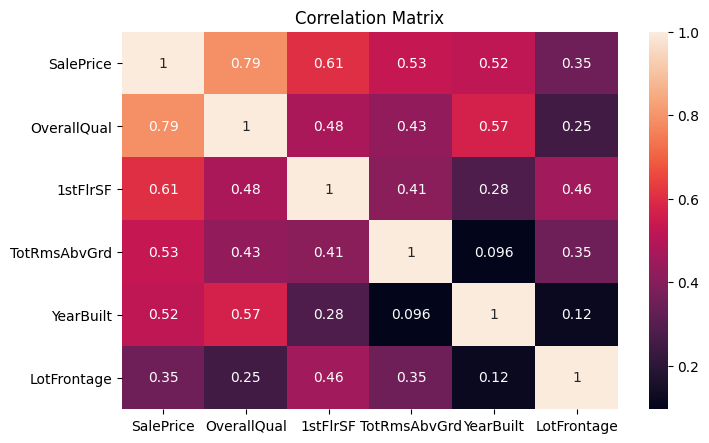

In [52]:
plt.figure(dpi=100, figsize=(8, 5))
ax = plt.axes()
sns.heatmap(df.corr(), annot=True, ax = ax)
ax.set_title('Correlation Matrix')
plt.show()

##Transformacion I

In [14]:
datat1 = df.filter(["OverallQual", "1stFlrSF"])
datat1.head()

,OverallQual,1stFlrSF
0,7.0,856.0
1,6.0,1262.0
2,7.0,920.0
3,7.0,961.0
4,8.0,1145.0


### Polinomio grado 2

In [15]:
poly = PolynomialFeatures(2)
trans1 = poly.fit_transform(datat1)
trans1

array([[1.000000e+00, 7.000000e+00, 8.560000e+02, 4.900000e+01,
        5.992000e+03, 7.327360e+05],
       [1.000000e+00, 6.000000e+00, 1.262000e+03, 3.600000e+01,
        7.572000e+03, 1.592644e+06],
       [1.000000e+00, 7.000000e+00, 9.200000e+02, 4.900000e+01,
        6.440000e+03, 8.464000e+05],
       ...,
       [1.000000e+00, 7.000000e+00, 1.188000e+03, 4.900000e+01,
        8.316000e+03, 1.411344e+06],
       [1.000000e+00, 5.000000e+00, 1.078000e+03, 2.500000e+01,
        5.390000e+03, 1.162084e+06],
       [1.000000e+00, 5.000000e+00, 1.256000e+03, 2.500000e+01,
        6.280000e+03, 1.577536e+06]])

In [43]:
df1 = pd.DataFrame(trans1)
df1

,0,1,2,3,4,5
0,1.0,7.0,856.0,49.0,5992.0,732736.0
1,1.0,6.0,1262.0,36.0,7572.0,1592644.0
2,1.0,7.0,920.0,49.0,6440.0,846400.0
3,1.0,7.0,961.0,49.0,6727.0,923521.0
4,1.0,8.0,1145.0,64.0,9160.0,1311025.0
...,...,...,...,...,...,...
1455,1.0,6.0,953.0,36.0,5718.0,908209.0
1456,1.0,6.0,2073.0,36.0,12438.0,4297329.0
1457,1.0,7.0,1188.0,49.0,8316.0,1411344.0
1458,1.0,5.0,1078.0,25.0,5390.0,1162084.0


##Transformacion II

In [21]:
datat2 = df.filter(["OverallQual", "1stFlrSF", "TotRmsAbvGrd"])
datat2.head()

,OverallQual,1stFlrSF,TotRmsAbvGrd
0,7.0,856.0,8.0
1,6.0,1262.0,6.0
2,7.0,920.0,6.0
3,7.0,961.0,7.0
4,8.0,1145.0,9.0


### Polinomio grado 3

In [22]:
poly = PolynomialFeatures(3)
trans2 = poly.fit_transform(datat2)
trans2

array([[1.0000000e+00, 7.0000000e+00, 8.5600000e+02, ..., 5.8618880e+06,
        5.4784000e+04, 5.1200000e+02],
       [1.0000000e+00, 6.0000000e+00, 1.2620000e+03, ..., 9.5558640e+06,
        4.5432000e+04, 2.1600000e+02],
       [1.0000000e+00, 7.0000000e+00, 9.2000000e+02, ..., 5.0784000e+06,
        3.3120000e+04, 2.1600000e+02],
       ...,
       [1.0000000e+00, 7.0000000e+00, 1.1880000e+03, ..., 1.2702096e+07,
        9.6228000e+04, 7.2900000e+02],
       [1.0000000e+00, 5.0000000e+00, 1.0780000e+03, ..., 5.8104200e+06,
        2.6950000e+04, 1.2500000e+02],
       [1.0000000e+00, 5.0000000e+00, 1.2560000e+03, ..., 9.4652160e+06,
        4.5216000e+04, 2.1600000e+02]])

In [49]:
df2 = pd.DataFrame(trans2)
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,7.0,856.0,8.0,49.0,5992.0,56.0,732736.0,6848.0,64.0,343.0,41944.0,392.0,5129152.0,47936.0,448.0,6.272220e+08,5861888.0,54784.0,512.0
1,1.0,6.0,1262.0,6.0,36.0,7572.0,36.0,1592644.0,7572.0,36.0,216.0,45432.0,216.0,9555864.0,45432.0,216.0,2.009917e+09,9555864.0,45432.0,216.0
2,1.0,7.0,920.0,6.0,49.0,6440.0,42.0,846400.0,5520.0,36.0,343.0,45080.0,294.0,5924800.0,38640.0,252.0,7.786880e+08,5078400.0,33120.0,216.0
3,1.0,7.0,961.0,7.0,49.0,6727.0,49.0,923521.0,6727.0,49.0,343.0,47089.0,343.0,6464647.0,47089.0,343.0,8.875037e+08,6464647.0,47089.0,343.0
4,1.0,8.0,1145.0,9.0,64.0,9160.0,72.0,1311025.0,10305.0,81.0,512.0,73280.0,576.0,10488200.0,82440.0,648.0,1.501124e+09,11799225.0,92745.0,729.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.0,6.0,953.0,7.0,36.0,5718.0,42.0,908209.0,6671.0,49.0,216.0,34308.0,252.0,5449254.0,40026.0,294.0,8.655232e+08,6357463.0,46697.0,343.0
1456,1.0,6.0,2073.0,7.0,36.0,12438.0,42.0,4297329.0,14511.0,49.0,216.0,74628.0,252.0,25783974.0,87066.0,294.0,8.908363e+09,30081303.0,101577.0,343.0
1457,1.0,7.0,1188.0,9.0,49.0,8316.0,63.0,1411344.0,10692.0,81.0,343.0,58212.0,441.0,9879408.0,74844.0,567.0,1.676677e+09,12702096.0,96228.0,729.0
1458,1.0,5.0,1078.0,5.0,25.0,5390.0,25.0,1162084.0,5390.0,25.0,125.0,26950.0,125.0,5810420.0,26950.0,125.0,1.252727e+09,5810420.0,26950.0,125.0


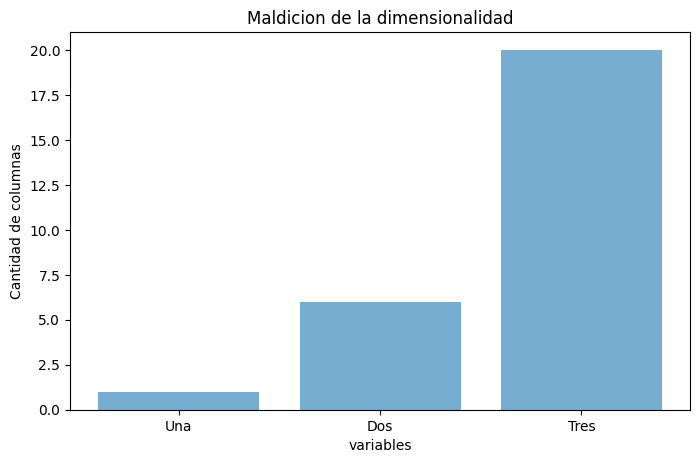

In [57]:
plt.figure(dpi=100, figsize=(8, 5))
objects = ('Una', 'Dos', 'Tres')
performance = [1, len(df1.columns), len(df2.columns)]

plt.bar(y_pos, performance, align='center', alpha=0.6)
plt.xticks(y_pos, objects)
plt.ylabel('Cantidad de columnas')
plt.xlabel('variables')
plt.title('Maldicion de la dimensionalidad')

plt.show()

#Conclusiones

Despues de haber trabajado en el primer curso solo con una variable, y el segundo curso haber aplicado transformacion de variables me he dado cuenta que la complejidad de los problemas de ML. Al hacer las transformaciones la cantidad de columnas aumenta, en la comparativa solo usando 3 variables la cantidad de columnas ascendio a 19.

En los problemas las dimensiones puede ser no opciona quitarlas y eso implica muchas dimensiones al momento de hacer ingenieria de caracteristicas por lo tanto mas costo de recursos de computacionales.
